In [2]:
#Step 1: Data Collection & Integration
#For portfolio purposes, let's use a public telecom dataset. In a real-world scenario, you would be pulling data from multiple systems (CRM, billing, etc.), but we'll simulate that process.

In [5]:
# Step 1: Data Collection & Integration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual styles for our plots
plt.style.use('fivethirtyeight')
sns.set(style="whitegrid")

# Load the dataset (simulating data integration from multiple systems)
print("Loading and integrating customer data...")
df = pd.read_csv('https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv')

# Quick look at the integrated data
print(f"\nDataset dimensions: {df.shape[0]} customers with {df.shape[1]} attributes")
print("\nFirst 5 customer records:")
print(df.head())

# Overview of the types of data we have
print("\nData types in our integrated dataset:")
print(df.dtypes)

Loading and integrating customer data...

Dataset dimensions: 7043 customers with 21 attributes

First 5 customer records:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4               


--- Data Quality Check ---
Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Duplicate records: 0

--- Converting Data Types ---
Converting TotalCharges to numeric...
Replacing 11 missing values in TotalCharges
Converting binary categorical features to numeric...

--- Exploratory Data Analysis ---

Basic statistics for numeric features:
       SeniorCitizen      Partner   Dependents       tenure  PhoneService  \
count    7043.000000  7043.000000  7043.000000  7043.000000   7043.000000   
mean        0.162147     0.483033     0.299588    32.

D:\Anaconda3\ipykernel_15092\3883127835.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


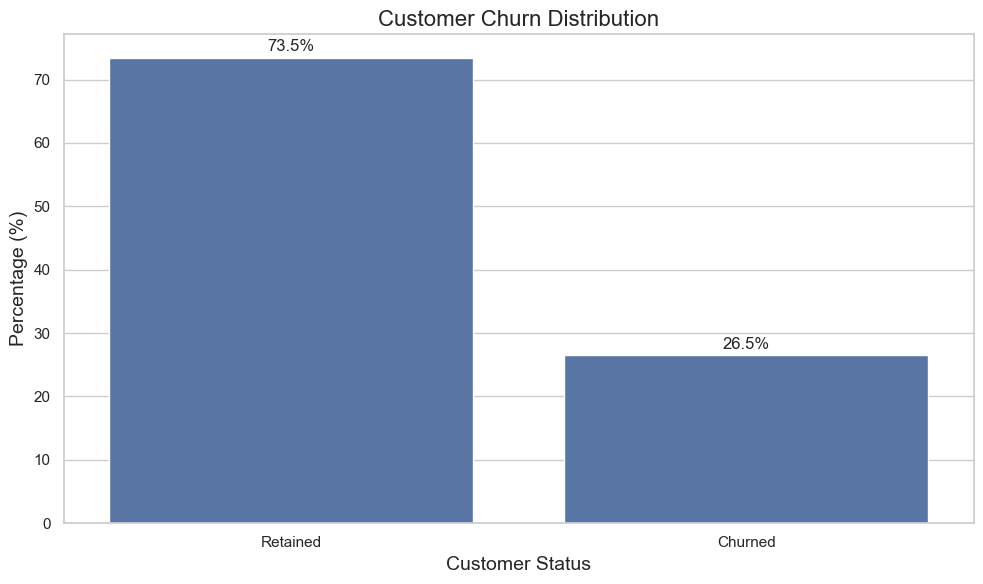


Churn distribution visualization saved as 'churn_distribution.png'


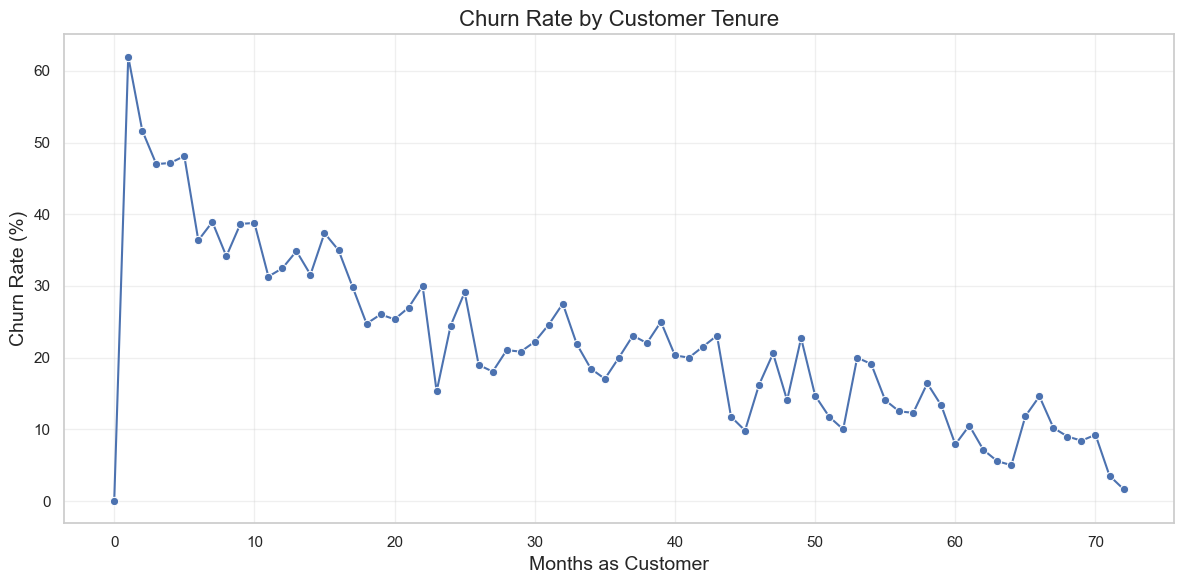


Tenure vs. churn visualization saved as 'churn_by_tenure.png'


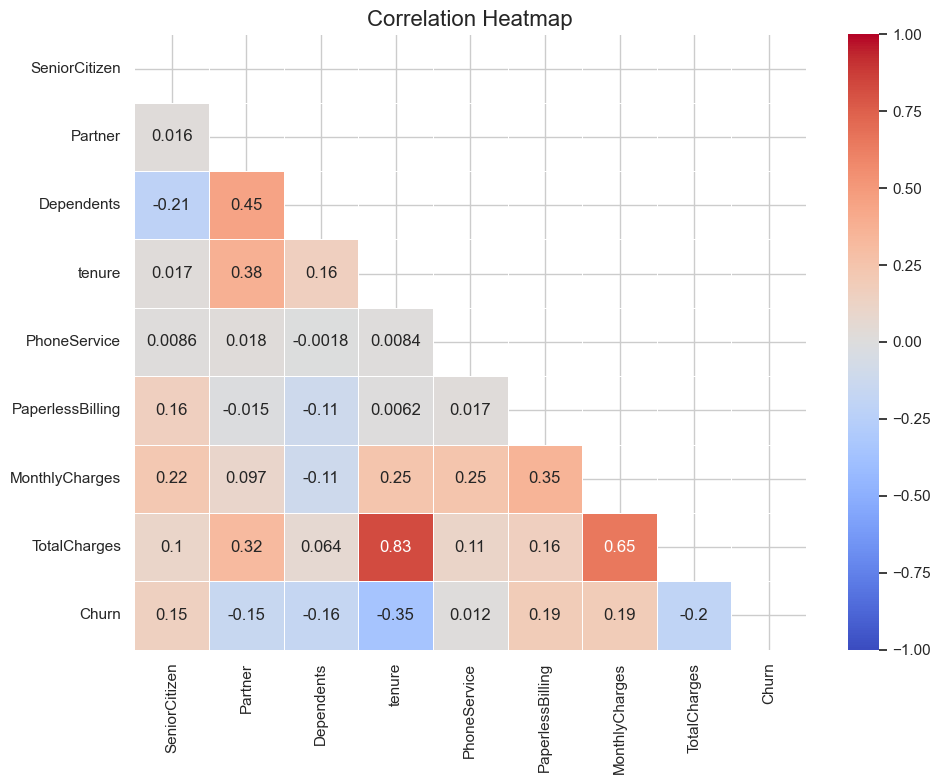


Correlation heatmap saved as 'correlation_heatmap.png'


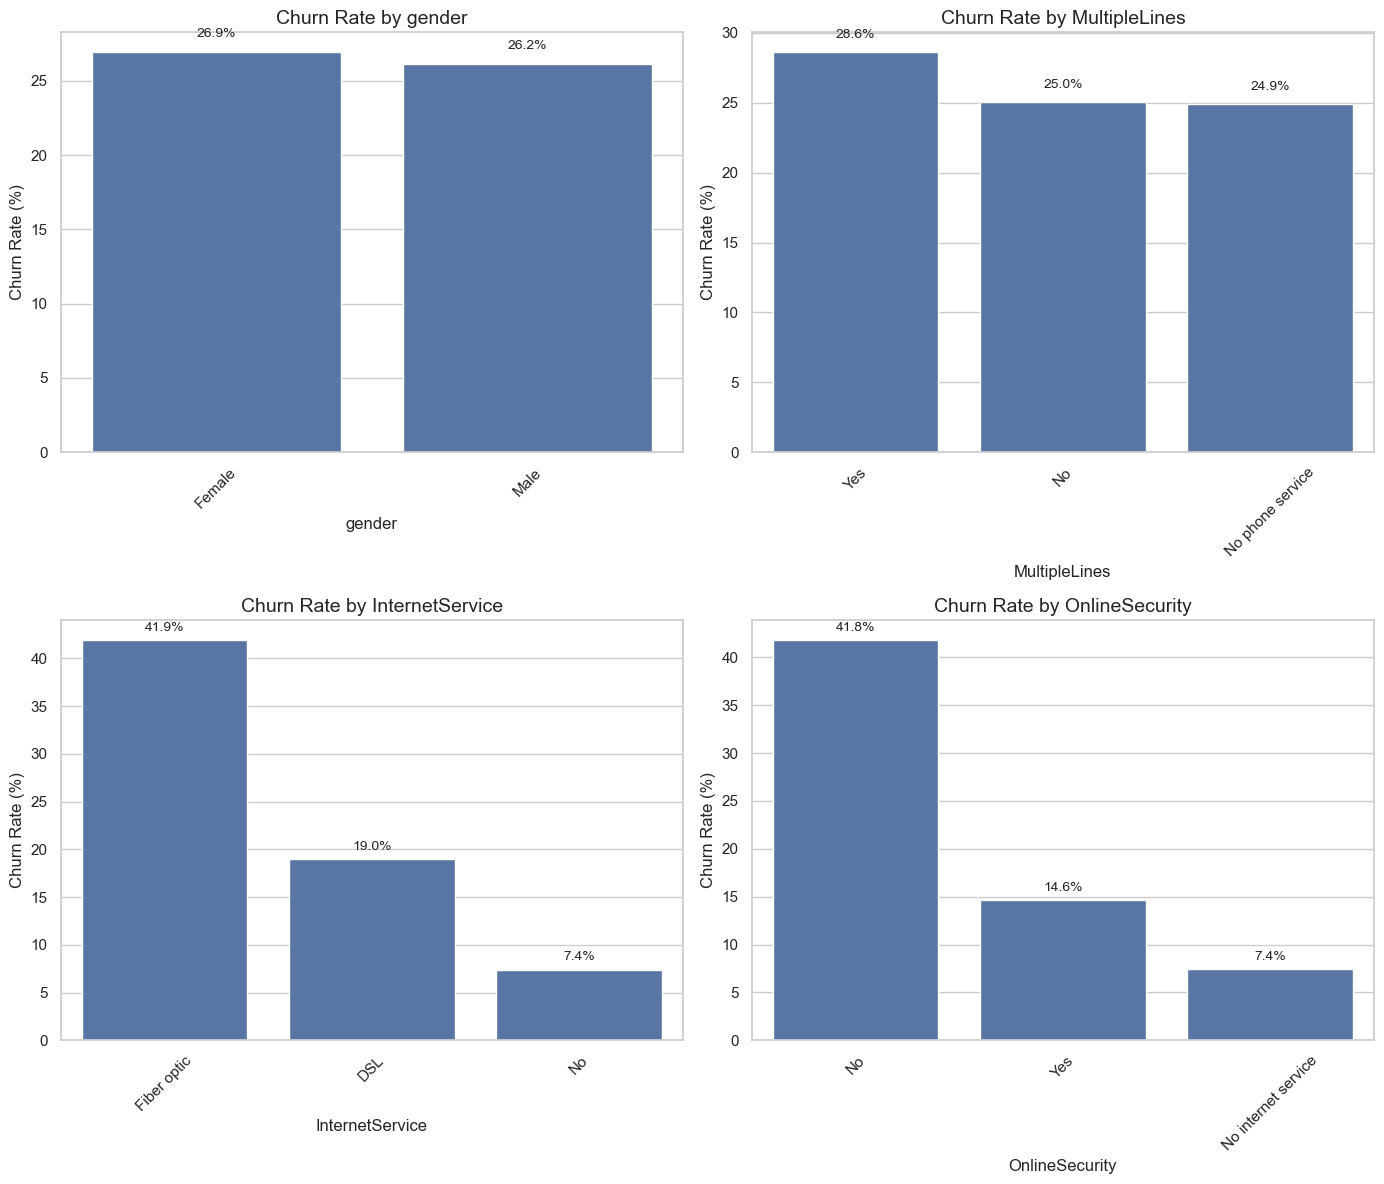


Categorical features analysis saved as 'categorical_features_analysis.png'

Data preparation and exploration complete!


In [7]:
#Step 2: Data Preparation & Exploration
#Now let's prepare the data and do some exploratory analysis:



# Step 2: Data Preparation & Exploration

# 2.1 Data Quality Check
print("\n--- Data Quality Check ---")
print("Missing values per column:")
print(df.isnull().sum())

# Handle missing values if any exist
if df.isnull().sum().sum() > 0:
    print("\nHandling missing values...")
    # For numeric columns, fill with median
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)
    
    # For categorical columns, fill with mode
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mode()[0], inplace=True)

# Check for duplicates
print(f"\nDuplicate records: {df.duplicated().sum()}")

# 2.2 Data Type Conversions
print("\n--- Converting Data Types ---")
# TotalCharges should be numeric
if 'TotalCharges' in df.columns and df['TotalCharges'].dtype == 'object':
    print("Converting TotalCharges to numeric...")
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    # Fill any resulting NaN values
    if df['TotalCharges'].isnull().sum() > 0:
        print(f"Replacing {df['TotalCharges'].isnull().sum()} missing values in TotalCharges")
        df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Convert binary categorical features to numeric
print("Converting binary categorical features to numeric...")
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].map({'Yes': 1, 'No': 0})

# Convert 'Churn' to numeric if it exists and is categorical
if 'Churn' in df.columns and df['Churn'].dtype == 'object':
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 2.3 Exploratory Data Analysis
print("\n--- Exploratory Data Analysis ---")

# Basic statistics for numeric features
print("\nBasic statistics for numeric features:")
print(df.describe())

# Churn rate calculation
if 'Churn' in df.columns:
    churn_rate = df['Churn'].mean() * 100
    print(f"\nOverall churn rate: {churn_rate:.2f}%")
    
    # Creating our first visualization for the portfolio
    plt.figure(figsize=(10, 6))
    churn_counts = df['Churn'].value_counts()
    churn_percent = churn_counts / len(df) * 100
    
    ax = sns.barplot(x=['Retained', 'Churned'], y=churn_percent.values)
    plt.title('Customer Churn Distribution', fontsize=16)
    plt.xlabel('Customer Status', fontsize=14)
    plt.ylabel('Percentage (%)', fontsize=14)
    
    # Add percentage labels on top of bars
    for i, p in enumerate(ax.patches):
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
                height + 1,
                f'{height:.1f}%',
                ha="center", fontsize=12)
    
    plt.tight_layout()
    plt.savefig('churn_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\nChurn distribution visualization saved as 'churn_distribution.png'")

# 2.4 Relationship between tenure and churn
if 'tenure' in df.columns and 'Churn' in df.columns:
    plt.figure(figsize=(12, 6))
    
    # Group by tenure and calculate churn rate
    tenure_churn = df.groupby('tenure')['Churn'].mean() * 100
    
    ax = sns.lineplot(x=tenure_churn.index, y=tenure_churn.values, marker='o')
    plt.title('Churn Rate by Customer Tenure', fontsize=16)
    plt.xlabel('Months as Customer', fontsize=14)
    plt.ylabel('Churn Rate (%)', fontsize=14)
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('churn_by_tenure.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\nTenure vs. churn visualization saved as 'churn_by_tenure.png'")

# 2.5 Correlation analysis for numeric features
numeric_df = df.select_dtypes(include=['int64', 'float64'])
if len(numeric_df.columns) > 1:  # Need at least 2 columns for correlation
    plt.figure(figsize=(10, 8))
    correlation = numeric_df.corr()
    
    # Create a mask for the upper triangle
    mask = np.triu(correlation)
    
    # Draw the heatmap
    sns.heatmap(correlation, annot=True, mask=mask, cmap='coolwarm', 
                linewidths=0.5, vmin=-1, vmax=1)
    plt.title('Correlation Heatmap', fontsize=16)
    
    plt.tight_layout()
    plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\nCorrelation heatmap saved as 'correlation_heatmap.png'")

# 2.6 Categorical features analysis
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'customerID' in categorical_cols:
    categorical_cols.remove('customerID')  # Remove ID column

if len(categorical_cols) > 0 and 'Churn' in df.columns:
    # Select top 4 categorical features for visualization
    top_categorical = categorical_cols[:4]
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    axes = axes.flatten()
    
    for i, col in enumerate(top_categorical):
        # Calculate churn rate by category
        churn_by_category = df.groupby(col)['Churn'].mean() * 100
        
        # Sort by churn rate for better visualization
        churn_by_category = churn_by_category.sort_values(ascending=False)
        
        # Plot
        ax = axes[i]
        sns.barplot(x=churn_by_category.index, y=churn_by_category.values, ax=ax)
        ax.set_title(f'Churn Rate by {col}', fontsize=14)
        ax.set_xlabel(col, fontsize=12)
        ax.set_ylabel('Churn Rate (%)', fontsize=12)
        ax.tick_params(axis='x', rotation=45)
        
        # Add percentage labels
        for j, p in enumerate(ax.patches):
            height = p.get_height()
            ax.text(p.get_x() + p.get_width()/2.,
                    height + 1,
                    f'{height:.1f}%',
                    ha="center", fontsize=10)
    
    plt.tight_layout()
    plt.savefig('categorical_features_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\nCategorical features analysis saved as 'categorical_features_analysis.png'")

print("\nData preparation and exploration complete!")


--- Feature Engineering ---
Converting categorical variables to dummy variables...
Categorical columns to encode: ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
Shape after encoding: (7043, 32)

Creating interaction features...
Created TotalValueToDate = tenure * MonthlyCharges
Created AvgMonthlySpend = TotalCharges / (tenure + 1)
Created SpendingTrend = MonthlyCharges / AvgMonthlySpend

Scaling numeric features: ['tenure', 'MonthlyCharges', 'TotalCharges', 'TotalValueToDate', 'AvgMonthlySpend', 'SpendingTrend']

Top 10 features correlated with churn:
SpendingTrend                     0.313009
InternetService_Fiber optic       0.308020
PaymentMethod_Electronic check    0.301919
MonthlyCharges                    0.193356
PaperlessBilling                  0.191825
SeniorCitizen                     0.150889
StreamingTV_Yes                   0.063228
Streamin

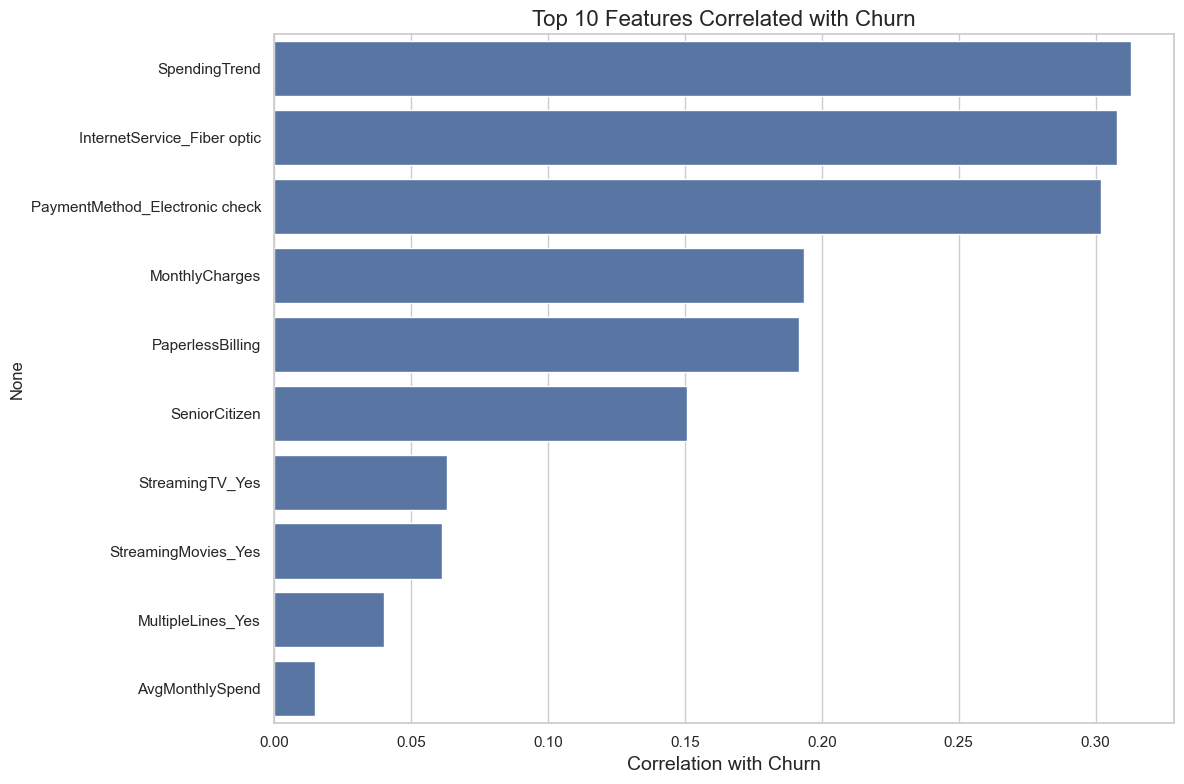


Top churn correlations visualization saved as 'top_churn_correlations.png'

Feature engineering complete!
Final dataset shape: (7043, 35)
First 5 rows of engineered features:
   customerID  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0  7590-VHVEG              0        1           0 -1.277445             0   
1  5575-GNVDE              0        0           0  0.066327             1   
2  3668-QPYBK              0        0           0 -1.236724             1   
3  7795-CFOCW              0        0           0  0.514251             0   
4  9237-HQITU              0        0           0 -1.236724             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1       -1.160323     -0.994242      0  ...   
1                 0       -0.259629     -0.173244      0  ...   
2                 1       -0.362660     -0.959674      1  ...   
3                 0       -0.746535     -0.194766      0  ...   
4                 1        0.197365 

In [9]:
# Step 3: Feature Engineering

print("\n--- Feature Engineering ---")

# 3.1 Convert categorical variables to dummy variables
print("Converting categorical variables to dummy variables...")
# First identify categorical columns we need to encode
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'customerID' in categorical_cols:
    categorical_cols.remove('customerID')  # Remove ID column
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')  # We'll encode this separately as our target

print(f"Categorical columns to encode: {categorical_cols}")

# Use pandas get_dummies to convert categorical variables to dummy variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print(f"Shape after encoding: {df_encoded.shape}")

# 3.2 Create interaction features
print("\nCreating interaction features...")
if 'tenure' in df.columns and 'MonthlyCharges' in df.columns:
    # Customer value: tenure * monthly charges
    df_encoded['TotalValueToDate'] = df_encoded['tenure'] * df_encoded['MonthlyCharges']
    print("Created TotalValueToDate = tenure * MonthlyCharges")

# 3.3 Create ratio features
if 'MonthlyCharges' in df.columns and 'TotalCharges' in df.columns:
    # Average monthly spend over customer lifetime
    df_encoded['AvgMonthlySpend'] = df_encoded['TotalCharges'] / (df_encoded['tenure'] + 1)  # Add 1 to avoid division by zero
    print("Created AvgMonthlySpend = TotalCharges / (tenure + 1)")

    # Ratio that shows if recent spending is higher or lower than average
    df_encoded['SpendingTrend'] = df_encoded['MonthlyCharges'] / df_encoded['AvgMonthlySpend']
    print("Created SpendingTrend = MonthlyCharges / AvgMonthlySpend")

# 3.4 Create binary features for potential risk indicators
# Customers with month-to-month contracts may be at higher risk of churning
if 'Contract_Month-to-month' in df_encoded.columns:
    print("Contract type already encoded as dummy variable")

# 3.5 Feature scaling
from sklearn.preprocessing import StandardScaler

# First separate out the features we want to scale
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
additional_numeric = ['TotalValueToDate', 'AvgMonthlySpend', 'SpendingTrend']
numeric_cols.extend([col for col in additional_numeric if col in df_encoded.columns])

print(f"\nScaling numeric features: {numeric_cols}")
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# 3.6 Feature importance analysis
if 'Churn' in df_encoded.columns:
    # Quick check of feature correlation with churn
    churn_correlation = df_encoded.drop('customerID', axis=1).corr()['Churn'].sort_values(ascending=False)
    print("\nTop 10 features correlated with churn:")
    print(churn_correlation[1:11])  # Skipping Churn itself which will be perfectly correlated
    
    # Visualize the top correlations
    plt.figure(figsize=(12, 8))
    top_corr = churn_correlation[1:11]  # Skip the first one (which is Churn itself)
    sns.barplot(x=top_corr.values, y=top_corr.index)
    plt.title('Top 10 Features Correlated with Churn', fontsize=16)
    plt.xlabel('Correlation with Churn', fontsize=14)
    plt.tight_layout()
    plt.savefig('top_churn_correlations.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\nTop churn correlations visualization saved as 'top_churn_correlations.png'")

print("\nFeature engineering complete!")
print(f"Final dataset shape: {df_encoded.shape}")
print("First 5 rows of engineered features:")
print(df_encoded.head())

# Save the prepared dataset for the modeling step
df_encoded.to_csv('telco_churn_prepared.csv', index=False)
print("\nPrepared dataset saved as 'telco_churn_prepared.csv'")


--- Model Development ---
Feature set shape: (7043, 33)
Target set shape: (7043,)
Training set: 5634 samples
Testing set: 1409 samples

Checking class balance in training set:
Churn
0    73.464679
1    26.535321
Name: proportion, dtype: float64

Applying SMOTE to handle class imbalance...
Class distribution after SMOTE:
Churn
0    50.0
1    50.0
Name: proportion, dtype: float64
Resampled training set: 8278 samples

Training and evaluating models...

Model: Logistic Regression
Accuracy: 0.7431
Precision: 0.5115
Recall: 0.7112
F1 Score: 0.5951
AUC: 0.8264

Model: Random Forest
Accuracy: 0.7630
Precision: 0.5452
Recall: 0.6444
F1 Score: 0.5907
AUC: 0.8255

Model: XGBoost
Accuracy: 0.7388
Precision: 0.5064
Recall: 0.6364
F1 Score: 0.5640
AUC: 0.8048


C:\ANACONDA\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:49:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Figure size 1200x800 with 0 Axes>

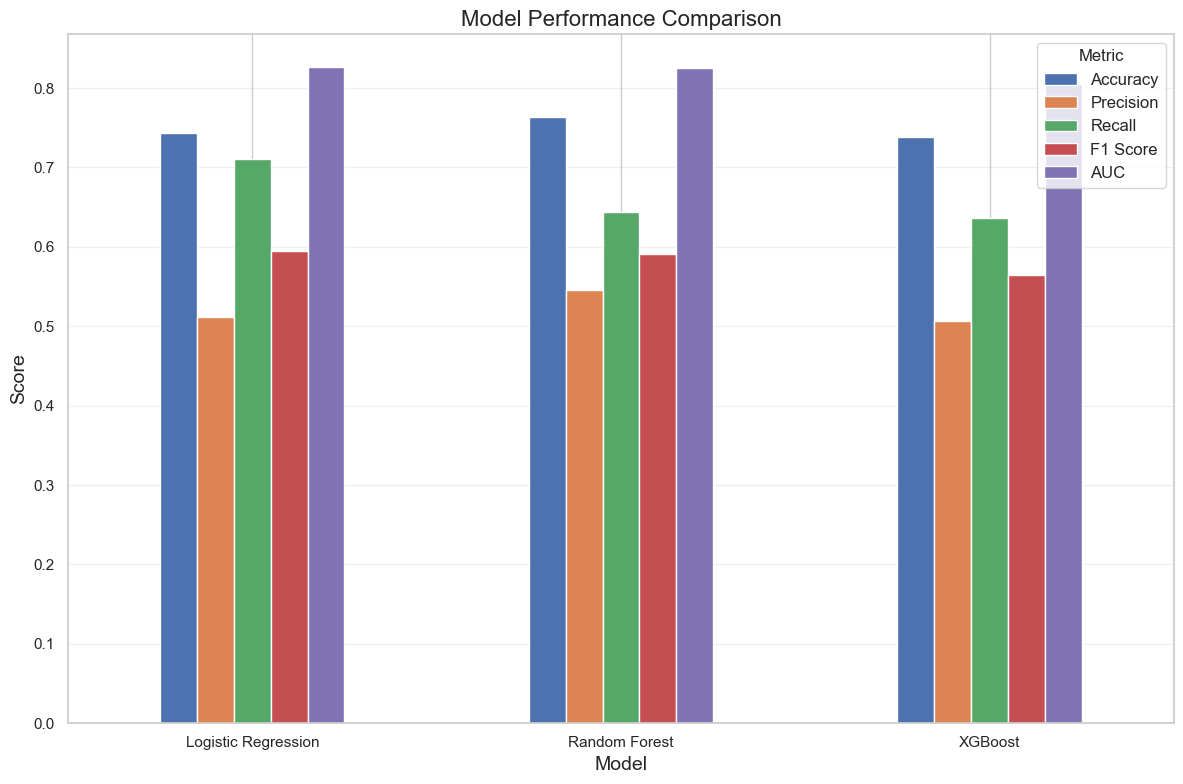


Model comparison visualization saved as 'model_comparison.png'


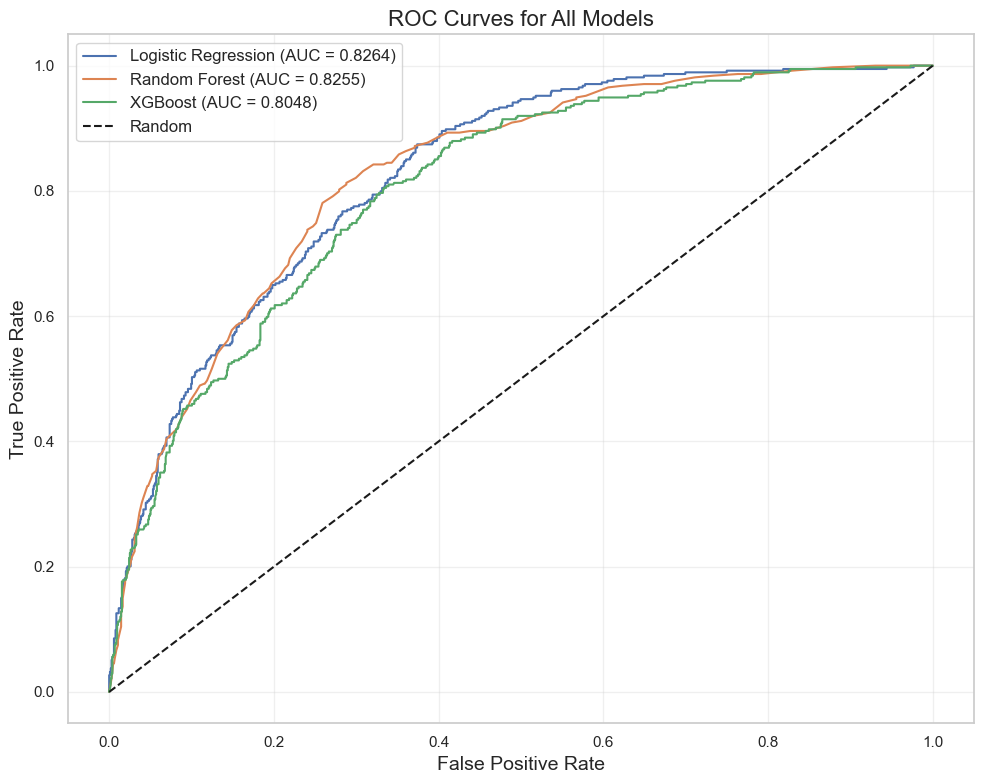


ROC curves visualization saved as 'roc_curves.png'

Best model based on F1 score: Logistic Regression


D:\Anaconda3\ipykernel_15092\3812525235.py:193: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=importance_df, palette=colors)


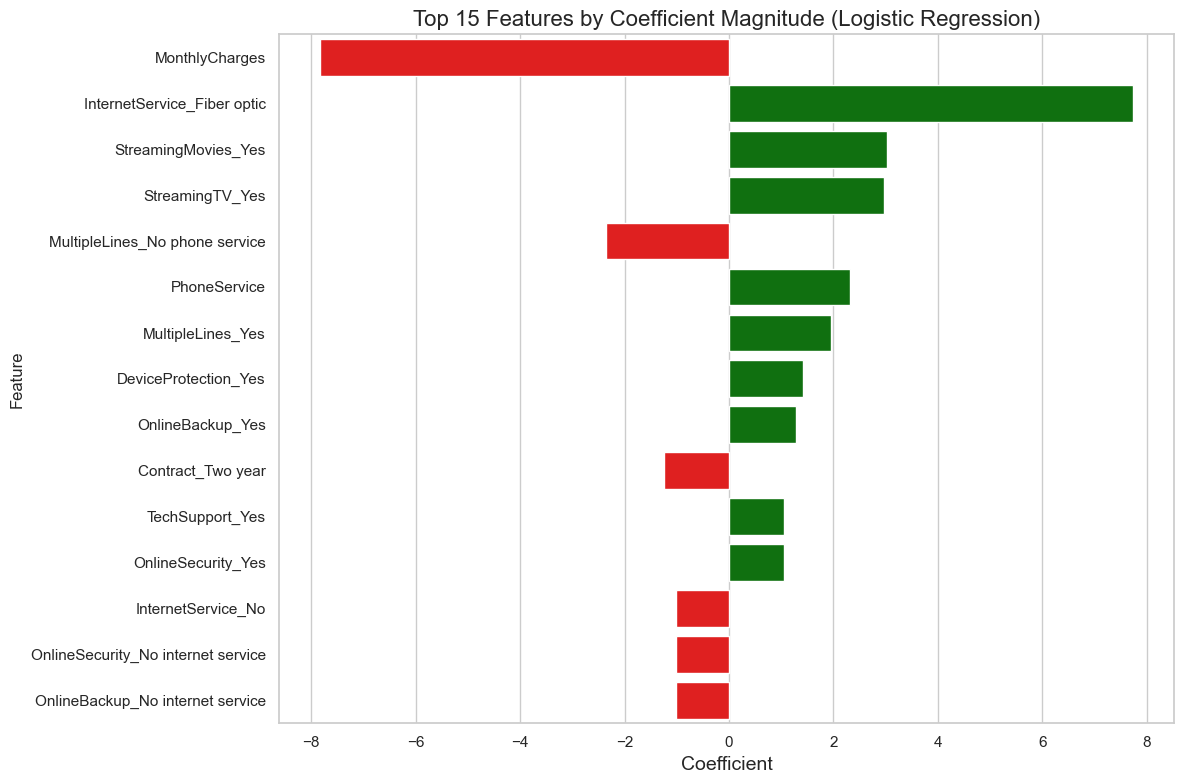


Feature coefficients visualization saved as 'feature_coefficients.png'


In [17]:
# Step 4: Model Development
print("\n--- Model Development ---")

# 4.1 Splitting the dataset
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# First, separate features and target
X = df_encoded.drop(['customerID', 'Churn'], axis=1)
y = df_encoded['Churn']

print(f"Feature set shape: {X.shape}")
print(f"Target set shape: {y.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

# 4.2 Handling class imbalance
from imblearn.over_sampling import SMOTE

print("\nChecking class balance in training set:")
print(y_train.value_counts(normalize=True) * 100)

print("\nApplying SMOTE to handle class imbalance...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts(normalize=True) * 100)
print(f"Resampled training set: {X_train_resampled.shape[0]} samples")

# 4.3 Train and evaluate multiple models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Dictionary to store results
results = {}

print("\nTraining and evaluating models...")
for name, model in models.items():
    print(f"\nModel: {name}")
    
    # Train the model
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")
    
    # Store results
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc,
        'model': model,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

# 4.4 Compare models visually
# Create a DataFrame with the results
model_comparison = pd.DataFrame({
    'Accuracy': [results[m]['accuracy'] for m in models.keys()],
    'Precision': [results[m]['precision'] for m in models.keys()],
    'Recall': [results[m]['recall'] for m in models.keys()],
    'F1 Score': [results[m]['f1'] for m in models.keys()],
    'AUC': [results[m]['auc'] for m in models.keys()]
}, index=models.keys())

# Plot the results
plt.figure(figsize=(12, 8))
model_comparison.plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Metric', fontsize=12)
plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nModel comparison visualization saved as 'model_comparison.png'")

# 4.5 ROC curves for all models
plt.figure(figsize=(10, 8))

for name in models.keys():
    fpr, tpr, _ = roc_curve(y_test, results[name]['y_pred_proba'])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {results[name]['auc']:.4f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves for All Models', fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nROC curves visualization saved as 'roc_curves.png'")

# 4.6 Feature importance for the best model (let's assume XGBoost is best)
best_model_name = max(results, key=lambda x: results[x]['f1'])
print(f"\nBest model based on F1 score: {best_model_name}")

if best_model_name == 'XGBoost':
    # Get feature importance from XGBoost
    feature_importance = results[best_model_name]['model'].feature_importances_
    feature_names = X.columns
    
    # Create DataFrame for visualization
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    }).sort_values('Importance', ascending=False).head(15)
    
    # Visualize feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title('Top 15 Features by Importance (XGBoost)', fontsize=16)
    plt.xlabel('Importance', fontsize=14)
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\nFeature importance visualization saved as 'feature_importance.png'")
elif best_model_name == 'Random Forest':
    # Get feature importance from Random Forest
    feature_importance = results[best_model_name]['model'].feature_importances_
    feature_names = X.columns
    
    # Create DataFrame for visualization
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    }).sort_values('Importance', ascending=False).head(15)
    
    # Visualize feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title('Top 15 Features by Importance (Random Forest)', fontsize=16)
    plt.xlabel('Importance', fontsize=14)
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\nFeature importance visualization saved as 'feature_importance.png'")
elif best_model_name == 'Logistic Regression':
    # Get coefficients from Logistic Regression
    coefficients = results[best_model_name]['model'].coef_[0]
    feature_names = X.columns
    
    # Create DataFrame for visualization
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    })
    
    # Sort by absolute coefficient value - fixing the issue
    # Create a new column for absolute values to sort properly
    importance_df['AbsCoefficient'] = np.abs(importance_df['Coefficient'])
    importance_df = importance_df.sort_values('AbsCoefficient', ascending=False).head(15)
    
    # Visualize coefficients
    plt.figure(figsize=(12, 8))
    colors = ['red' if c < 0 else 'green' for c in importance_df['Coefficient']]
    sns.barplot(x='Coefficient', y='Feature', data=importance_df, palette=colors)
    plt.title('Top 15 Features by Coefficient Magnitude (Logistic Regression)', fontsize=16)
    plt.xlabel('Coefficient', fontsize=14)
    plt.tight_layout()
    plt.savefig('feature_coefficients.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\nFeature coefficients visualization saved as 'feature_coefficients.png'")


--- Business Implementation ---
Sample of customer risk profiles:
      CustomerID  ChurnProbability  ActualChurn RiskCategory
437   4376-KFVRS          0.129847            0          Low
2280  2754-SDJRD          0.728602            0         High
2235  9917-KWRBE          0.046934            0          Low
4460  0365-GXEZS          0.687654            0         High
3761  9385-NXKDA          0.121390            0          Low
5748  4686-UXDML          0.800963            0    Very High
3568  2227-JRSJX          0.552923            0         High
2976  4830-FAXFM          0.305028            0       Medium
5928  1830-IPXVJ          0.009737            0          Low
1639  4690-LLKUA          0.396349            1       Medium

Customer distribution by risk category:
RiskCategory
High         281
Low          635
Medium       254
Very High    239
Name: count, dtype: int64

Actual churn rate by predicted risk category:
RiskCategory
High         37.366548
Low           5.669291
Medium  

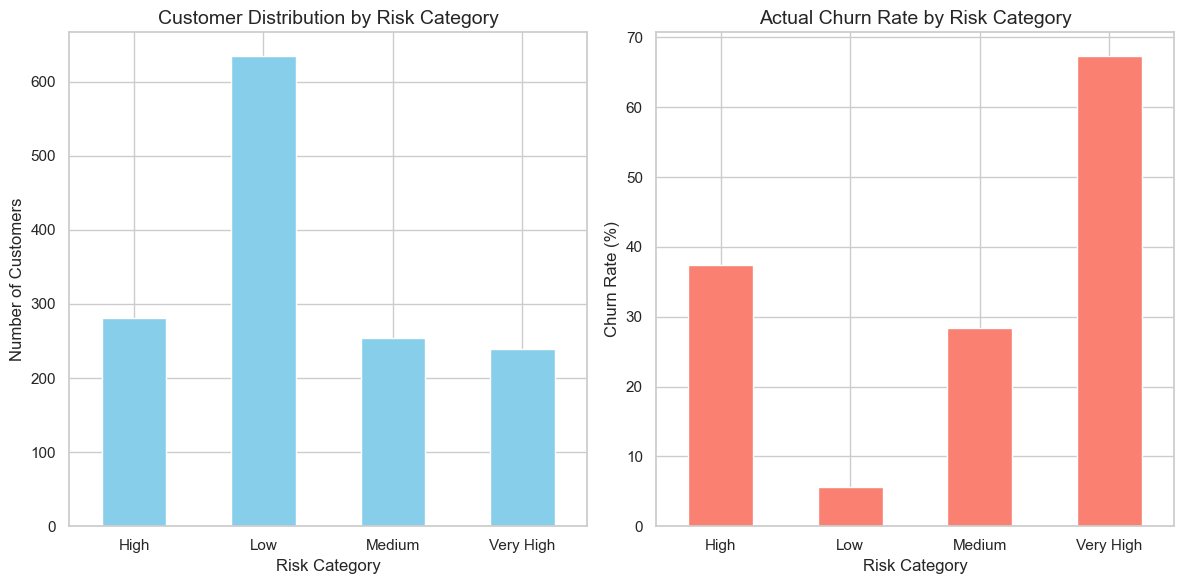


Risk category analysis visualization saved as 'risk_category_analysis.png'

Business Impact Analysis:
High-risk customers identified: 520
Cost of retention program: $52,000.00
Estimated customers retained: 208
Estimated revenue saved: $249,600.00
Net benefit: $197,600.00


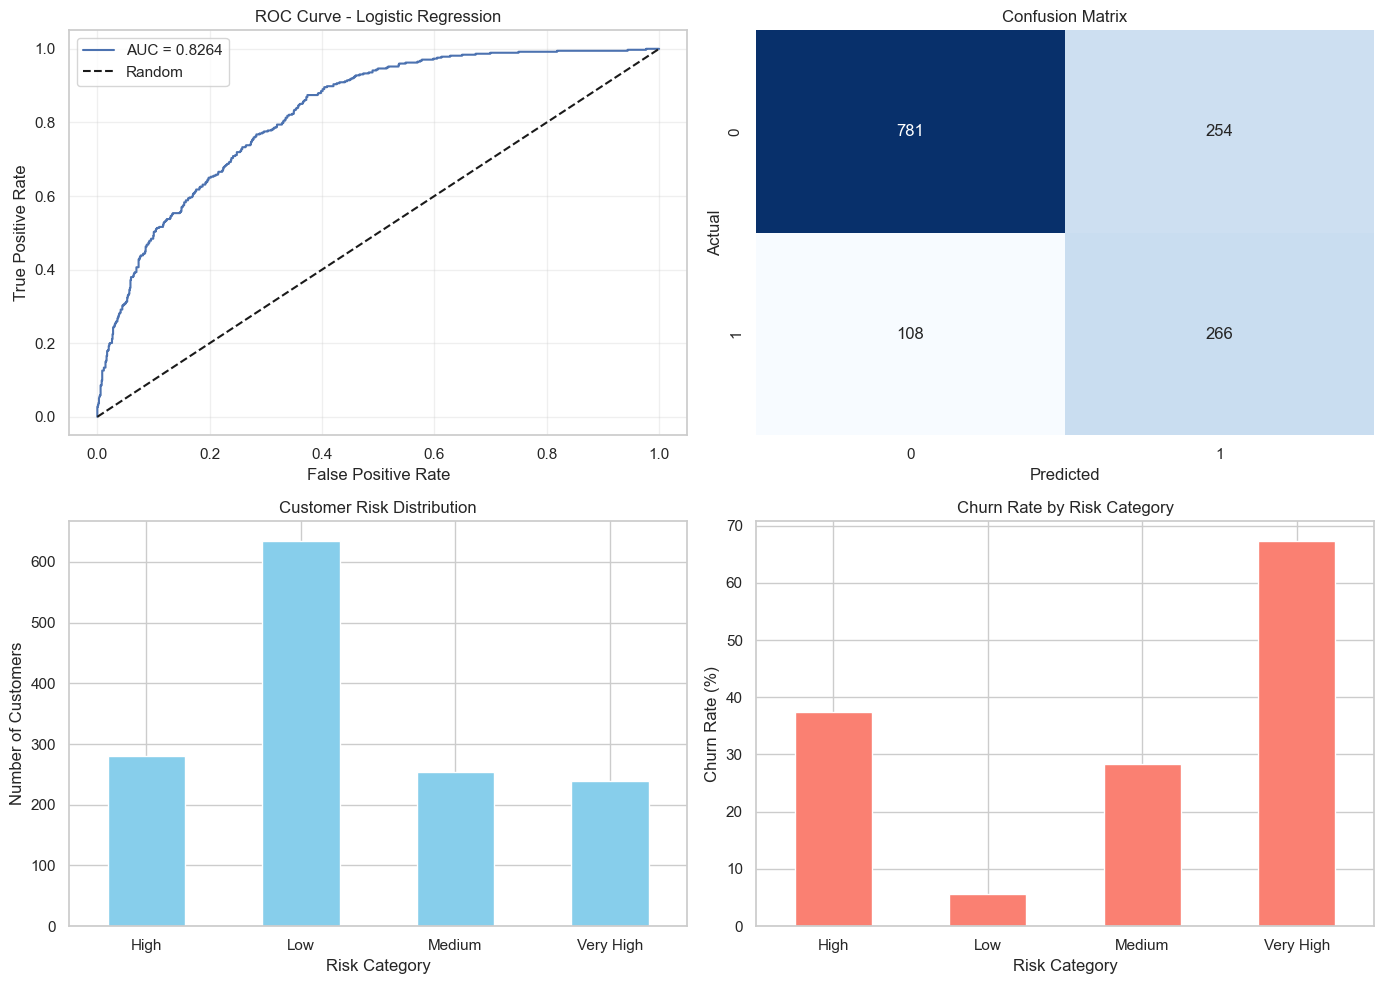


Churn prediction dashboard saved as 'churn_prediction_dashboard.png'

Business implementation complete!


In [19]:
# Step 5: Business Implementation
print("\n--- Business Implementation ---")

# 5.1 Create a customer risk scoring function using the best model
best_model = results[best_model_name]['model']

def predict_churn_probability(customer_data):
    """
    Predicts the probability of churn for a customer.
    
    Args:
        customer_data: DataFrame with customer features
        
    Returns:
        Probability of churn (0 to 1)
    """
    # Ensure customer data has the same format as training data
    # In a real implementation, we would need to apply the same preprocessing steps
    
    # Predict probability
    churn_probability = best_model.predict_proba(customer_data)[:, 1]
    return churn_probability

# 5.2 Define risk categories based on churn probability
def assign_risk_category(probability):
    """
    Assigns a risk category based on churn probability.
    
    Args:
        probability: Churn probability (0 to 1)
        
    Returns:
        Risk category (Low, Medium, High, Very High)
    """
    if probability < 0.25:
        return "Low"
    elif probability < 0.50:
        return "Medium"
    elif probability < 0.75:
        return "High"
    else:
        return "Very High"

# 5.3 Create risk profile for all test customers
# Predict probabilities
test_probabilities = best_model.predict_proba(X_test)[:, 1]

# Create DataFrame with customer IDs and probabilities
customer_risk = pd.DataFrame({
    'CustomerID': df_encoded.loc[X_test.index, 'customerID'],
    'ChurnProbability': test_probabilities,
    'ActualChurn': y_test
})

# Assign risk categories
customer_risk['RiskCategory'] = customer_risk['ChurnProbability'].apply(assign_risk_category)

print("Sample of customer risk profiles:")
print(customer_risk.head(10))

# 5.4 Evaluate the business impact of the model
# Distribution of customers by risk category
risk_distribution = customer_risk['RiskCategory'].value_counts().sort_index()
print("\nCustomer distribution by risk category:")
print(risk_distribution)

# Actual churn rate within each risk category
risk_churn = customer_risk.groupby('RiskCategory')['ActualChurn'].mean() * 100
print("\nActual churn rate by predicted risk category:")
print(risk_churn)

# Visualize risk distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
risk_distribution.plot(kind='bar', color='skyblue')
plt.title('Customer Distribution by Risk Category', fontsize=14)
plt.xlabel('Risk Category', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
risk_churn.plot(kind='bar', color='salmon')
plt.title('Actual Churn Rate by Risk Category', fontsize=14)
plt.xlabel('Risk Category', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.xticks(rotation=0)

plt.tight_layout()
plt.savefig('risk_category_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nRisk category analysis visualization saved as 'risk_category_analysis.png'")

# 5.5 Calculate potential revenue savings
# Assuming:
# - Average monthly revenue per customer = $50
# - Average customer lifetime = 24 months
# - Targeted retention program costs $100 per customer
# - Retention program has 40% success rate for high and very high risk customers

avg_monthly_revenue = 50
avg_customer_lifetime = 24
retention_program_cost = 100
retention_success_rate = 0.4

# Count high and very high risk customers
high_risk_count = customer_risk[customer_risk['RiskCategory'].isin(['High', 'Very High'])].shape[0]

# Calculate potential costs and benefits
total_retention_cost = high_risk_count * retention_program_cost
customers_retained = high_risk_count * retention_success_rate
revenue_saved = customers_retained * avg_monthly_revenue * avg_customer_lifetime
net_benefit = revenue_saved - total_retention_cost

print("\nBusiness Impact Analysis:")
print(f"High-risk customers identified: {high_risk_count}")
print(f"Cost of retention program: ${total_retention_cost:,.2f}")
print(f"Estimated customers retained: {customers_retained:.0f}")
print(f"Estimated revenue saved: ${revenue_saved:,.2f}")
print(f"Net benefit: ${net_benefit:,.2f}")

# 5.6 Create a simple dashboard visualization
plt.figure(figsize=(14, 10))

# Top left: ROC curve of the best model
plt.subplot(2, 2, 1)
fpr, tpr, _ = roc_curve(y_test, results[best_model_name]['y_pred_proba'])
plt.plot(fpr, tpr, label=f"AUC = {results[best_model_name]['auc']:.4f}")
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {best_model_name}')
plt.legend()
plt.grid(alpha=0.3)

# Top right: Confusion matrix
plt.subplot(2, 2, 2)
cm = confusion_matrix(y_test, results[best_model_name]['y_pred'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Bottom left: Risk category distribution
plt.subplot(2, 2, 3)
risk_distribution.plot(kind='bar', color='skyblue')
plt.title('Customer Risk Distribution')
plt.xlabel('Risk Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

# Bottom right: Churn rate by risk category
plt.subplot(2, 2, 4)
risk_churn.plot(kind='bar', color='salmon')
plt.title('Churn Rate by Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=0)

plt.tight_layout()
plt.savefig('churn_prediction_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nChurn prediction dashboard saved as 'churn_prediction_dashboard.png'")

print("\nBusiness implementation complete!")